此示例说明如何在对信号进行下采样时避免混叠。如果离散时间信号的基带频谱支持不限于宽度为 2π/M 弧度的区间，则以 M 为因子下采样会导致混叠。混叠是当信号频谱的多个副本重叠在一起时发生的失真。信号的基带频谱支持超出 2π/M 弧度越多，混叠越严重。以下示例演示了以 2 为因子下采样的信号中的混叠。信号的基带频谱支持超过了 π 弧度的宽度。

创建一个基带频谱支持等于 3π/2 弧度的信号。

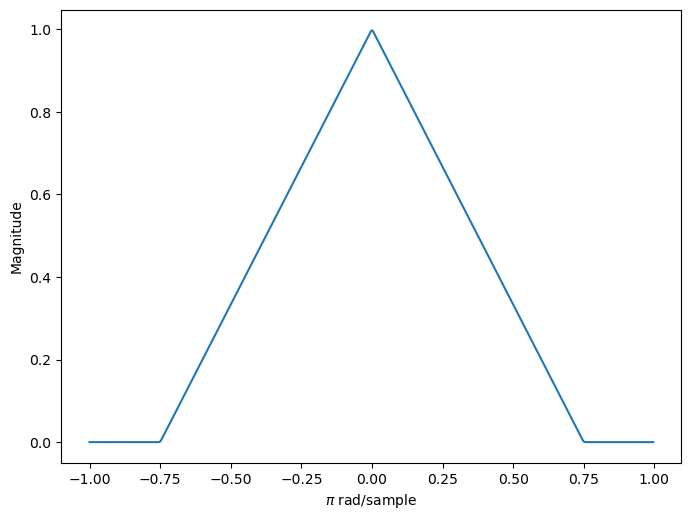

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import *

f = [0,0.2500,0.5000,0.7500,1.0000]
a = [1.00,0.6667,0.3333,0,0]
nf=512
b1=signal.firwin2(nf-1, f,a, nfreqs=None, window='hamming', nyq=None, antisymmetric=False, fs=None)
[h1,h2]=fft.fftshift(signal.freqz(b1, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
omg=np.linspace(-np.pi,np.pi-2*np.pi/nf,nf)
fig = plt.figure(dpi=100,figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(omg/np.pi,abs(h1))
plt.xlabel('$\pi$ rad/sample')
plt.ylabel('Magnitude')
plt.show()

以 2 为因子对信号下采样，并绘制下采样信号的频谱和原始信号的频谱。除频谱的幅值缩放之外，重叠频谱副本的叠合还会导致 ∣ω∣>π/2 的原始频谱失真。

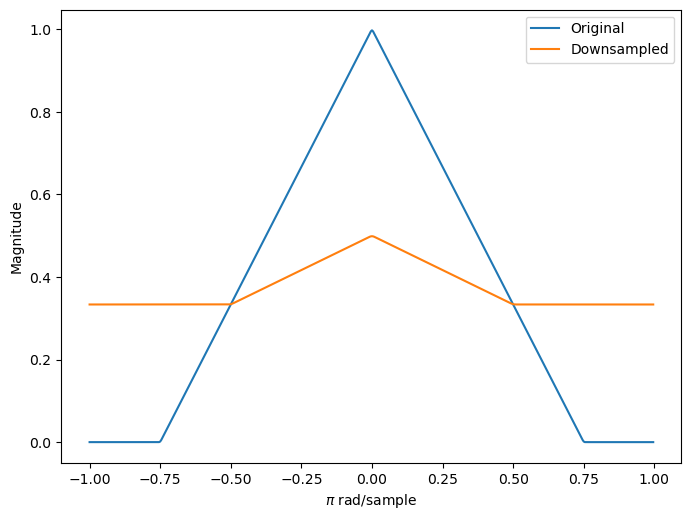

In [6]:
y1=b1[1::2] 
[h3,h4]=fft.fftshift(signal.freqz(y1, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
fig = plt.figure(dpi=100,figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(omg/np.pi,abs(h1),label='Original')
ax1.plot(omg/np.pi,abs(h3),label='Downsampled')
plt.xlabel('$\pi$ rad/sample')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

将信号的基带频谱支持增加到 [−7π/8,7π/8] 并以 2 为因子对信号下采样。绘制原始频谱和下采样信号的频谱。频谱宽度的增加导致下采样信号频谱中更明显的混叠，因为有更多信号能量处在 [−π/2,π/2] 之外。

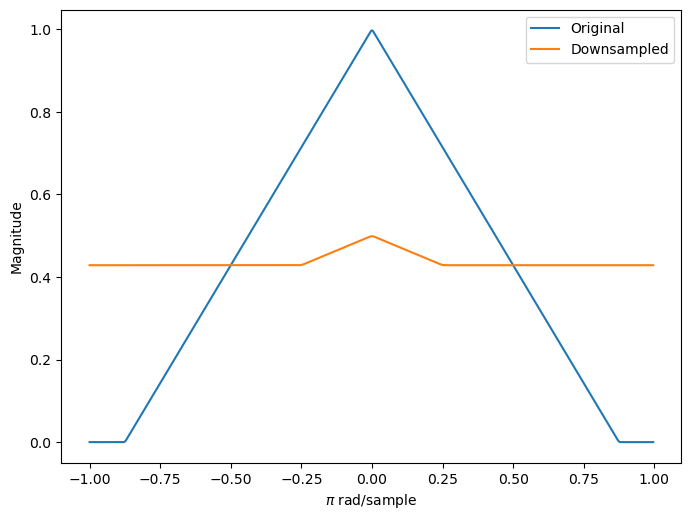

In [7]:
f1= [0,0.2500, 0.5000, 0.7500, 7/8, 1.0000]
a1= [1.00, 0.7143 ,0.4286, 0.1429, 0 ,0]
nf=512
b2=signal.firwin2(nf-1, f1,a1, nfreqs=None, window='hamming', nyq=None, antisymmetric=False, fs=None)
[h1,h2]=fft.fftshift(signal.freqz(b2, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
y2=b2[1::2] 
[h3,h4]=fft.fftshift(signal.freqz(y2, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
omg=np.linspace(-np.pi,np.pi-2*np.pi/nf,nf)
fig = plt.figure(dpi=100,figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(omg/np.pi,abs(h1),label='Original')
ax1.plot(omg/np.pi,abs(h3),label='Downsampled')
plt.xlabel('$\pi$ rad/sample')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

最后，构造基带频谱支持仅限于 [−π/2,π/2] 的信号。以 2 为因子对信号下采样，并绘制原始信号的频谱和下采样信号的频谱。下采样信号是全频带信号。下采样信号的频谱是原始频谱的扩展和缩放版本，但频谱的形状得以保留，因为频谱副本不重叠。没有混叠。

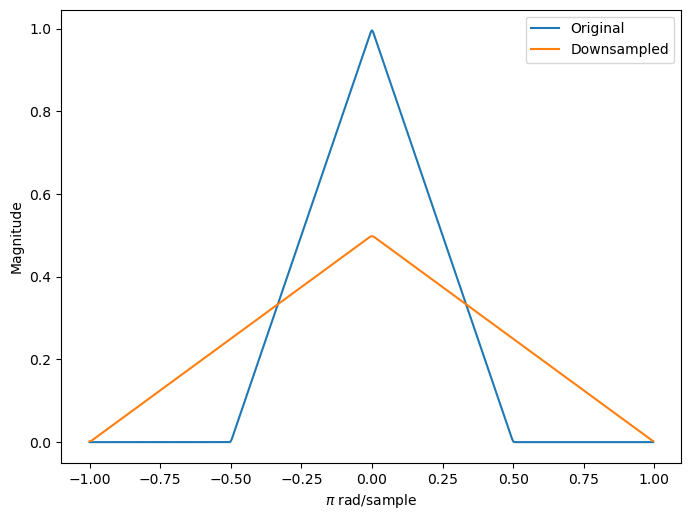

In [8]:
f2= [0, 0.250 ,0.500 ,0.7500, 1]
a2= [1.0000, 0.5000 ,0 ,0 ,0]
nf=512
b2=signal.firwin2(nf-1, f2,a2, nfreqs=None, window='hamming', nyq=None, antisymmetric=False, fs=None)
[h1,h2]=fft.fftshift(signal.freqz(b2, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
y2=b2[1::2] 
[h3,h4]=fft.fftshift(signal.freqz(y2, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
omg=np.linspace(-np.pi,np.pi-2*np.pi/nf,nf)
fig = plt.figure(dpi=100,figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(omg/np.pi,abs(h1),label='Original')
ax1.plot(omg/np.pi,abs(h3),label='Downsampled')
plt.xlabel('$\pi$ rad/sample')
plt.ylabel('Magnitude')
plt.legend()
plt.show()